# Project Content

In [79]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import Bio
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# 1- COVID-19: Genetic information

In [12]:
DNAsequence = SeqRecord(seq=Seq('MN908947'), description='Severe acute respiratory syndrome coronavirus2 isolate Wuhan-Hu-1')

In [13]:
DNAsequence

SeqRecord(seq=Seq('MN908947'), id='<unknown id>', name='<unknown name>', description='Severe acute respiratory syndrome coronavirus2 isolate Wuhan-Hu-1', dbxrefs=[])

In [24]:
#SeqIO.write(DNAsequence,'/Users/shayestehbazsefidpar/Documents/machine learning/archive/MN908947.txt','fasta' )

In [22]:
DNA_Seq= SeqIO.read('/Users/shayestehbazsefidpar/Documents/machine learning/archive/MN908947.txt','fasta')

In [23]:
DNA_Seq

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [25]:
len(DNA_Seq)

29903

In [49]:
#print(DNA_Seq.format("fasta")) 
print( DNA_Seq[:200])

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...GGT')


In [50]:
#Count the nucleotides frequency in the DNA
dnalst = list(DNA_Seq)
C = [0]
T = [0]
A = [0]
G = [0]
for d in dnalst:
    for i,v in enumerate(d): 
        if v== 'C':
            C[i] += 1
        elif v == 'T':
            T[i] += 1
        elif v == 'A':
            A[i] += 1
        elif v == 'G':
            G[i] += 1
print('the number of C is:',C)
print('the number of T is:' ,T)
print('the number of A is:',A)
print('the number of G is:', G)


the number of C is: [5492]
the number of T is: [9594]
the number of A is: [8954]
the number of G is: [5863]


# 2- Transcription

Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.

Basically the mRNA is a copy of our DNA. However, in RNA, a base called uracil (U) replaces thymine (T) as the complementary nucleotide to adenine (that's the only difference, T is replaced by U).

In [54]:
#mRNA_covid = DNA_Seq.seq#Convert DNA into mRNA Sequence
covid_mRNA = DNA_Seq.seq.transcribe()
print(covid_mRNA[:200])              #Transcribe a DNA sequence into RNA.

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGU


In [60]:
print(f'Covid-19 DNA: {DNA_Seq[:50]}')
print(f'Covid-19 RNA: {covid_mRNA[:50]}')

Covid-19 DNA: ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC')
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


In [61]:
print('Size : ',len(covid_mRNA))

Size :  29903


# 3- Translation

Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

It is essentially a translation from one code (nucleotide A T C G sequence) to another code (amino acid sequence).

How does this translation happen? As in any language, we need a dictionary for translation, in this case the amino acid dictionary is the table below. The nucleotides are read in groups of three "AUG GCC CAG UUA ...". Each triplet is called a codon and codes for a specific amino acid.

There are 61 codons for 20 amino acids, and each of them is "read" to specify a certain amino acid out of the 20 commonly found in proteins.

One codon, AUG, specifies the amino acid methionine and also acts as a start codon to signal the start of protein construction.

There are three more codons that do not specify amino acids. These stop codons, UAA, UAG, and UGA, tell the cell when a polypeptide is complete. All together, this collection of codon-amino acid relationships is called the genetic code, because it lets cells “decode” an mRNA into a chain of amino acids.

Luckily, with the translate() function, python does translate the mRNA to amino acids chains. Chains are separated with a * which is the stop codon ( UAA, UAG and UGA)

First observation: The frequency of the nucleotides T and A is higher than the frequency of C and G. This is due to the nucleotides pairing.

This sequence of genetic bases contain all the information encoded in the virus. Understanding this genetic information is the key to find cures and vaccines. 

Question: How do we extract information from this long sequence of letters?

This process is called **gene expression**: Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins.

TRANSCRIPTION: DNA is copied out into a messenger RNA (mRNA)
TRANSLATION: mRNA is translated into amino acids
AMINO ACID FOLDING: A sequence of 20 or more amino acids (the building blocks of proteins) form a protein.

The standard genetic code is traditionally represented as an RNA codon table because, when proteins are made in a cell by ribosomes, it is mRNA that directs protein synthesis. The mRNA sequence is determined by the sequence of genomic DNA. Here are some features of codons:

Most codons specify an amino acid

Three “stop” codons mark the end of a protein

One “start” codon, AUG, marks the beginning of a protein and also encodes the amino acid methionine.

A series of codons in part of a messenger RNA (mRNA) molecule. **Each codon consists of three nucleotides, usually corresponding to a single amino acid.** The nucleotides are abbreviated with the letters A, U, G, and C. This is mRNA, which uses U (uracil). DNA uses T (thymine) instead. **This mRNA molecule will instruct a ribosome to synthesize a protein according to this code**

In [81]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [66]:
covid_aa = covid_mRNA.translate()
print(covid_aa[:500])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVL


In [67]:
print(f"Covid-19's genome has {len(covid_aa)} amino acids")

Covid-19's genome has 9967 amino acids


We have several chains of a total of 9967 amino acids separated with stop codons *

The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [69]:
Proteins = covid_aa.split('*')
Proteins[:10]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR'),
 Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('RWHLWLSRS'),
 Seq('KRRFAST'),
 Seq('TALCVHQTFGCSNCTSWSCYG')]

In [70]:
print(f'We have {len(Proteins)} amino acid chains in the covid-19 genome')

We have 775 amino acid chains in the covid-19 genome


**RECAP:**

1- We started our analysis with the whole genome, that has 29903 nucleotides.

2- Transcribed the DNA or copied it out to an mRNA.

3- The mRNA was translated to 9967 amino acids.

4- The amino acid sequences were split at the stop codons.

5- We ended up with 775 amino acid chains.

It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the chains with more than 20 amino acid chains: **Proteins**.

In [71]:
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)

In [72]:
print(f'We have {len(Proteins)} proteins with  more than 20 amino acids in the covid-19 genome')

We have 80 proteins with  more than 20 amino acids in the covid-19 genome


In [73]:
for i in Proteins[:]:
    if len(i) < 50:
        Proteins.remove(i)

In [74]:
print(f'We have {len(Proteins)} proteins with  more than 50 amino acids in the covid-19 genome')

We have 5 proteins with  more than 50 amino acids in the covid-19 genome


In [77]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro_= pro.sort_values(by=['Protein length'], ascending=False)

In [80]:
pro_

,amino acid sequence,Protein length
0,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSN...,2701
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASK...,290
4,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHV...,123
2,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSS...,83
3,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEID,63


In [78]:
pd.options.display.max_colwidth = 80
cm = sns.light_palette("green", as_cmap=True)

s = pro_.style.background_gradient(cmap=cm)
s

,amino acid sequence,Protein length
0,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSYYCKSHKPPISFPLCANGQVFGLYKNTCVGSDNVTDFNAIATCDWTNAGDYILANTCTERLKLFAAETLKATEETFKLSYGIATVREVLSDRELHLSWEVGKPRPPLNRNYVFTGYRVTKNSKVQIGEYTFEKGDYGDAVVYRGTTTYKLNVGDYFVLTSHTVMPLSAPTLVPQEHYVRITGLYPTLNISDEFSSNVANYQKVGMQKYSTLQGPPGTGKSHFAIGLALYYPSARIVYTACSHAAVDALCEKALKYLPIDKCSRIIPARARVECFDKFKVNSTLEQYVFCTVNALPETTADIVVFDEISMATNYDLSVVNARLRAKHYVYIGDPAQLPAPRTLLTKGTLEPEYFNSVCRLMKTIGPDMFLGTCRRCPAEIVDTVSALVYDNKLKAHKDKSAQCFKMFYKGVITHDVSSAINRPQIGVVREFLTRNPAWRKAVFISPYNSQNAVASKILGLPTQTVDSSQGSEYDYVIFTQTTETAHSCNVNRFNVAITRAKVGILCIMSDRDLYDKLQFTSLEIPRRNVATLQAENVTGLFKDCSKVITGLHPTQAPTHLSVDTKFKTEGLCVDIPGIPKDMTYRRLISMMGFKMNYQVNGYPNMFITREEAIRHVRAWIGFDVEGCHATREAVGTNLPLQLGFSTGVNLVAVPTGYVDTPNNTDFSRVSAKPPPGDQFKHLIPLMYKGLPWNVVRIKIVQMLSDTLKNLSDRVVFVLWAHGFELTSMKYFVKIGPERTCCLCDRRATCFSTASDTYACWHHSIGFDYVYNPFMIDVQQWGFTGNLQSNHDLYCQVHGNAHVASCDAIMTRCLAVHECFVKRVDWTIEYPIIGDELKINAACRKVQHMVVKAALLADKFPVLHDIGNPKAIKCVPQADVEWKFYDAQPCSDKAYKIEELFYSYATHSDKFTDGVCLFWNCNVDRYPANSIVCRFDTRVLSNLNLPGCDGGSLYVNKHAFHTPAFDKSAFVNLKQLPFFYYSDSPCESHGKQVVSDIDYVPLKSATCITRCNLGGAVCRHHANEYRLYLDAYNMMISAGFSLWVYKQFDTYNLWNTFTRLQSLENVAFNVVNKGHFDGQQGEVPVSIINNTVYTKVDGVDVELFENKTTLPVNVAFELWAKRNIKPVPEVKILNNLGVDIAANTVIWDYKRDAPAHISTIGVCSMTDIAKKPTETICAPLTVFFDGRVDGQVDLFRNARNGVLITEGSVKGLQPSVGPKQASLNGVTLIGEAVKTQFNYYKKVDGVVQQLPETYFTQSRNLQEFKPRSQMEIDFLELAMDEFIERYKLEGYAFEHIVYGDFSHSQLGGLHLLIGLAKRFKESPFELEDFIPMDSTVKNYFITDAQTGSSKCVCSVIDLLLDDFVEIIKSQDLSVVSKVVKVTIDYTEISFMLWCKDGHVETFYPKLQSSQAWQPGVAMPNLYKMQRMLLEKCDLQNYGDSATLPKGIMMNVAKYTQLCQYLNTLTLAVPYNMRVIHFGAGSDKGVAPGTAVLRQWLPTGTLLVDSDLNDFVSDADSTLIGDCATVHTANKWDLIISDMYDPKTKNVTKENDSKEGFFTYICGFIQQKLALGGSVAIKITEHSWNADLYKLMGHFAWWTAFVTNVNASSSEAFLIGCNYLGKPREQIDGYVMHANYIFWRNTNPIQLSSYSLFDMSKFPLKLRGTAVMSLKEGQINDMILSLLSKGRLIIRENNRVVISSDVLVNN,2701
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASKIITLKKRWQLALSKGVHFVCNLLLLFVTVYSHLLLVAAGLEAPFLYLYALVYFLQSINFVRIIMRLWLCWKCRSKNPLLYDANYFLCWHTNCYDYCIPYNSVTSSIVITSGDGTTSPISEHDYQIGGYTEKWESGVKDCVVLHSYFTSDYYQLYSTQLSTDTGVEHVTFFIYNKIVDEPEEHVQIHTIDGSSGVVNPVMEPIYDEPTTTTSVPL,290
4,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRARSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE,123
2,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSSRVPDLLV,83
3,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEID,63


Protein Analysis With The Protparam Module In Biopython using ProtParam.

Available Tools in ProtParam:

**count_amino_acids**: Simply count the number times an amino acid is repeated in the protein sequence.

**get_amino_acids_percent**: The same as only returns the number in the percentage of the entire sequence.

**molecular_weight**: Calculates the molecular weight of a protein.

**aromaticity**: Calculates the aromaticity value of a protein according to Lobry & Gautier (1994, Nucleic Acids Res., 22, 3174-3180).

**flexibility**: Implementation of the flexibility method of Vihinen et al. (1994, Proteins, 19, 141-149).

**isoelectric_point**: This method uses the module IsoelectricPoint to calculate the pI of a protein.

**secondary_structure_fraction**: This method returns a list of the fraction of amino acids that tend to be in helix, turn, or sheet.

**Amino acids in Helix**: V, I, Y, F, W, L.

**Amino acids in Turn**: N, P, G, S.

**Amino acids in Sheet**: E, M, A, L.

The list contains 3 values: [Helix, Turn, Sheet].

In [85]:
#This cell will produce very lengthy output :D

from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in Proteins[:]: 
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI) 
    
    try:
        print("Amino acids percent = ", str(X.get_amino_acids_percent()))
    except ZeroDivisionError:
        pass
    print("Molecular weight = ", MW)
    
    try:
        print("Aromaticity = ", X.aromaticity()) 
    except ZeroDivisionError:
        pass
    print("Flexibility = ", X.flexibility()) 
    
    try:
        print("Secondary structure fraction = ", X.secondary_structure_fraction())
    except ZeroDivisionError:
          pass



Protein of Interest =  {'A': 179, 'C': 89, 'D': 178, 'E': 101, 'F': 143, 'G': 149, 'H': 70, 'I': 129, 'K': 159, 'L': 233, 'M': 63, 'N': 151, 'P': 110, 'Q': 88, 'R': 113, 'S': 162, 'T': 183, 'V': 229, 'W': 32, 'Y': 140}
Amino acids percent =  {'A': 0.06627175120325805, 'C': 0.03295075897815624, 'D': 0.06590151795631248, 'E': 0.03739355794150315, 'F': 0.052943354313217325, 'G': 0.05516475379489078, 'H': 0.0259163272861903, 'I': 0.047760088855979266, 'K': 0.05886708626434654, 'L': 0.08626434653831914, 'M': 0.02332469455757127, 'N': 0.055905220288781934, 'P': 0.04072565716401333, 'Q': 0.03258052573121066, 'R': 0.041836356904850054, 'S': 0.05997778600518327, 'T': 0.06775268419104036, 'V': 0.08478341355053684, 'W': 0.011847463902258423, 'Y': 0.0518326545723806}
Molecular weight =  305149.810100002
Aromaticity =  0.11662347278785636
Flexibility =  [1.0018452380952383, 0.9605952380952383, 0.9607261904761906, 0.9706904761904761, 1.0002857142857142, 0.9623214285714287, 1.001261904761905, 0.972

# Blast search

Now that we have the protein sequences, we will use the BLAST search.

BLAST (basic local alignment search tool) is an algorithm and program for comparing primary biological sequence information, such as the amino-acid sequences of proteins or the nucleotides of DNA and/or RNA sequences. A BLAST search enables a researcher to compare a subject protein or nucleotide sequence (called a query) with a library or database of sequences, and identify library sequences that resemble the query sequence above a certain threshold.

In other words, we will try to find the protein sequences already available in the databases that are the most similar to our protein sequences. (Hint: In this case, most probably the proteins that will have the highest similarity with our Covid-19 belong to the SARS coronavirus or Bat coronavirus).

https://www.ebi.ac.uk/Tools/sss/psiblast/

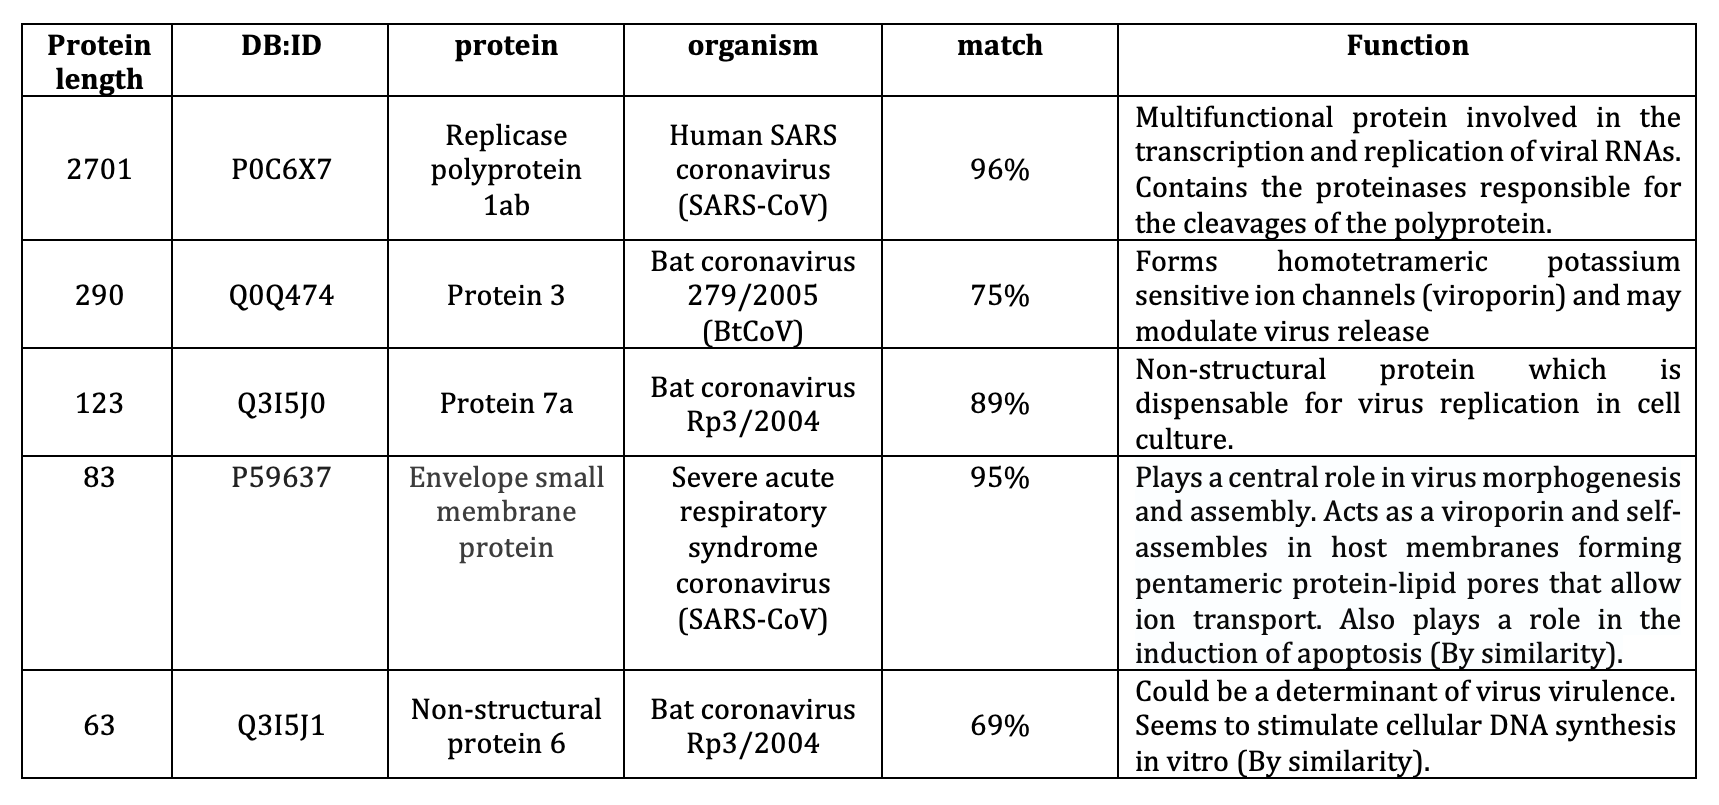

The table above shows the BLAST search results of the 5 amino acid chains obtained from the COVID-19 genome. As expected, all the viral proteins have high similarities with viral proteins in SARS and Bat coronaviruses.